#  **TFM**

## Paso 1. Importar librerías

In [1]:
import os
import warnings

# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# Análisis de nulos
import missingno as msno

# Estadística
import scipy.stats as stats

# Configuración de warnings
warnings.filterwarnings('ignore')

## Paso 2. Cargar datos

In [2]:
df=pd.read_csv('annual_number_of_deaths_by_cause.csv')

## Paso 3. Exploración inicial

In [3]:
def exploracion_inicial(df, nombre=None, tipo=None):
    """
    Realiza una exploración inicial de un DataFrame y muestra información clave.

    Parámetros:
    df (pd.DataFrame): El DataFrame a explorar.
    tipo (str, opcional): El tipo de exploración. 'simple' muestra menos detalles.

    Imprime:
    Información relevante sobre el DataFrame, incluyendo filas, columnas, tipos de datos,
    estadísticas descriptivas, y valores nulos.
    """
    if nombre:
      print(nombre.upper().center(90, ' # '))
      print('\n\n')

    # Información básica sobre el DataFrame
    num_filas, num_columnas = df.shape
    print(f"¿Cuántas filas y columnas hay en el conjunto de datos?")
    print(f"\tHay {num_filas:,} filas y {num_columnas:,} columnas.")
    print('#' * 90)

    # Exploración simple
    if tipo == 'simple':
        print("¿Cuáles son las primeras dos filas del conjunto de datos?")
        display(df.head(2))
    else:
        # Exploración completa
        print("¿Cuáles son las primeras cinco filas del conjunto de datos?")
        display(df.head())
        print('-' * 100)

        print("¿Cuáles son las últimas cinco filas del conjunto de datos?")
        display(df.tail())
        print('-' * 100)

        print("¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?")
        display(df.sample(n=5))
        print('-' * 100)

        print("¿Cuáles son las columnas del conjunto de datos?")
        print("\n".join(f"\t- {col}" for col in df.columns))
        print('-' * 100)

        print("¿Cuál es el tipo de datos de cada columna?")
        print(df.dtypes)
        print('-' * 100)

        print("¿Cuántas columnas hay de cada tipo de datos?")
        print(df.dtypes.value_counts())
        print('-' * 100)

        print("¿Cómo podríamos obtener información más completa sobre la estructura y el contenido del DataFrame?")
        print(df.info())
        print('-' * 100)

        print("¿Cuántos valores únicos tiene cada columna?")
        print(df.nunique())
        print('-' * 100)

        print("¿Cuáles son los valores únicos de cada columna?")
        df_valores_unicos = pd.DataFrame(df.apply(lambda x: x.unique()))
        display(df_valores_unicos)
        print('-' * 100)

        print("¿Cuáles son las estadísticas descriptivas básicas de todas las columnas?")
        display(df.describe(include='all').fillna(''))
        print('-' * 100)

        print("¿Cuántos valores nulos hay en cada columna del DataFrame?")
        display(df.isnull().sum())
        print('-' * 100)

        print("¿Cuál es el porcentaje de valores nulos por columna, ordenado de mayor a menor?")
        df_nulos = df.isnull().sum().div(len(df)).mul(100).round(2).reset_index().rename(columns = {'index': 'Col', 0: 'pct'})
        df_nulos = df_nulos.sort_values(by = 'pct', ascending=False).reset_index(drop = True)
        display(df_nulos)
        print('-' * 100)

        print("## Valores nulos: Visualización")
        msno.bar(df, figsize = (6, 3), fontsize= 9)
        plt.show()
        print('-' * 100)

        print("## Visualización de patrones en valores nulos")
        msno.matrix(df, figsize = (6, 3), fontsize= 9, sparkline = False)
        plt.show()
        print('-' * 100)

        msno.heatmap(df, figsize = (6, 3), fontsize= 9)
        plt.show()
        print('-' * 100)

    print('#' * 90)

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 6,840 filas y 34 columnas.
##########################################################################################
¿Cuáles son las primeras cinco filas del conjunto de datos?


,Entity,Code,Year,Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number),Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number),Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),...,Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number),Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),Deaths - Poisonings - Sex: Both - Age: All Ages (Number),Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Deaths - Road injuries - Sex: Both - Age: All Ages (Number),Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


----------------------------------------------------------------------------------------------------
¿Cuáles son las últimas cinco filas del conjunto de datos?


,Entity,Code,Year,Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number),Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number),Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),...,Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number),Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),Deaths - Poisonings - Sex: Both - Age: All Ages (Number),Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Deaths - Road injuries - Sex: Both - Age: All Ages (Number),Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number)
6835,Zimbabwe,ZWE,2015,1439,754,215,3019,2518,770,1302,...,3176,2108,381,2990,2373,2751,1956,4202,632,146
6836,Zimbabwe,ZWE,2016,1457,767,219,3056,2050,801,1342,...,3259,2160,393,3027,2436,2788,1962,4264,648,146
6837,Zimbabwe,ZWE,2017,1460,781,223,2990,2116,818,1363,...,3313,2196,398,2962,2473,2818,2007,4342,654,144
6838,Zimbabwe,ZWE,2018,1450,795,227,2918,2088,825,1396,...,3381,2240,400,2890,2509,2849,2030,4377,657,139
6839,Zimbabwe,ZWE,2019,1450,812,232,2884,2068,827,1434,...,3460,2292,405,2855,2554,2891,2065,4437,662,136


----------------------------------------------------------------------------------------------------
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,Entity,Code,Year,Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number),Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number),Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),...,Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number),Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),Deaths - Poisonings - Sex: Both - Age: All Ages (Number),Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Deaths - Road injuries - Sex: Both - Age: All Ages (Number),Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number)
2804,Ireland,IRL,2004,20,987,244,15,0,57,36,...,457,473,12,8,326,2014,333,1029,43,1
141,American Samoa,ASM,2011,1,6,3,2,0,4,3,...,39,21,0,2,5,21,6,12,0,0
1578,Dominica,DMA,2008,1,21,5,3,0,4,8,...,56,36,1,2,12,21,10,24,2,0
4848,Region of the Americas (WHO),NaN,2008,10350,222762,46926,34607,1926,23716,158857,...,228682,223183,3700,31932,161181,346381,168277,314226,10297,1048
3277,Liberia,LBR,1997,1025,173,52,1130,5083,137,75,...,390,443,69,1092,421,503,785,1249,87,143


----------------------------------------------------------------------------------------------------
¿Cuáles son las columnas del conjunto de datos?
	- Entity
	- Code
	- Year
	- Deaths - Meningitis - Sex: Both - Age: All Ages (Number)
	- Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)
	- Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)
	- Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number)
	- Deaths - Malaria - Sex: Both - Age: All Ages (Number)
	- Deaths - Drowning - Sex: Both - Age: All Ages (Number)
	- Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)
	- Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number)
	- Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)
	- Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)
	- Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)
	- Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)
	- Deaths - Lower

,0
Entity,"[Afghanistan, African Region (WHO), Albania, A..."
Code,"[AFG, nan, ALB, DZA, ASM, AND, AGO, ATG, ARG, ..."
Year,"[1990, 1991, 1992, 1993, 1994, 1995, 1996, 199..."
Deaths - Meningitis - Sex: Both - Age: All Ages (Number),"[2159, 2218, 2475, 2812, 3027, 3102, 3193, 330..."
Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),"[1116, 1136, 1162, 1187, 1211, 1225, 1239, 125..."
Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number),"[371, 374, 378, 384, 391, 394, 398, 402, 405, ..."
Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number),"[2087, 2153, 2441, 2837, 3081, 3131, 3175, 325..."
Deaths - Malaria - Sex: Both - Age: All Ages (Number),"[93, 189, 239, 108, 211, 175, 240, 563, 468, 2..."
Deaths - Drowning - Sex: Both - Age: All Ages (Number),"[1370, 1391, 1514, 1687, 1809, 1881, 1969, 207..."
Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),"[1538, 2001, 2299, 2589, 2849, 2969, 3331, 302..."


----------------------------------------------------------------------------------------------------
¿Cuáles son las estadísticas descriptivas básicas de todas las columnas?


,Entity,Code,Year,Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number),Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number),Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),...,Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number),Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),Deaths - Poisonings - Sex: Both - Age: All Ages (Number),Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Deaths - Road injuries - Sex: Both - Age: All Ages (Number),Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number)
count,6840,6150,6840.0,6840.0,6840.0,6840.0,6840.0,6840.0,6840.0,6840.0,...,6840.0,6840.0,6840.0,6840.0,6840.0,6840.0,6840.0,6840.0,6840.0,6840.0
unique,228,205,,,,,,,,,...,,,,,,,,,,
top,Afghanistan,AFG,,,,,,,,,...,,,,,,,,,,
freq,30,30,,,,,,,,,...,,,,,,,,,,
mean,,,2004.5,8213.149561,27363.188158,6493.627339,11006.353947,18903.160234,8619.055117,10636.648684,...,27143.007018,25068.928801,2145.455848,9531.528801,30634.95614,91303.897661,31898.919006,56525.512135,3006.043275,3112.06652
std,,,8.656074,34982.933895,111314.606169,25767.447063,48289.6871,97346.78057,35879.40601,40888.793762,...,103375.178904,96008.39114,8433.507625,41689.675155,116699.865828,377201.308879,119438.677613,210988.351746,11211.885249,14440.219516
min,,,1990.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,,,1997.0,19.0,128.75,37.0,11.0,0.0,39.0,48.0,...,286.0,214.0,8.0,6.0,207.75,368.5,204.75,400.0,21.0,2.0
50%,,,2004.5,150.5,845.5,209.0,159.0,0.0,253.0,342.0,...,1324.0,1080.0,72.0,120.0,1239.5,2104.0,1541.0,2778.5,152.0,21.5
75%,,,2012.0,1622.25,4251.0,984.0,2204.0,1017.25,1014.25,1391.25,...,4743.75,4497.5,371.0,2120.0,5786.25,9013.25,5670.5,9594.0,593.25,264.0


----------------------------------------------------------------------------------------------------
¿Cuántos valores nulos hay en cada columna del DataFrame?


Entity                                                                                        0
Code                                                                                        690
Year                                                                                          0
Deaths - Meningitis - Sex: Both - Age: All Ages (Number)                                      0
Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)         0
Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)                             0
Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number)                        0
Deaths - Malaria - Sex: Both - Age: All Ages (Number)                                         0
Deaths - Drowning - Sex: Both - Age: All Ages (Number)                                        0
Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)                          0
Deaths - Maternal disorders - Sex: Both 

----------------------------------------------------------------------------------------------------
¿Cuál es el porcentaje de valores nulos por columna, ordenado de mayor a menor?


,Col,pct
0,Code,10.09
1,Entity,0.00
2,Deaths - Chronic kidney disease - Sex: Both - ...,0.00
3,Deaths - Exposure to forces of nature - Sex: B...,0.00
4,Deaths - Diarrheal diseases - Sex: Both - Age:...,0.00
5,Deaths - Environmental heat and cold exposure ...,0.00
6,Deaths - Neoplasms - Sex: Both - Age: All Ages...,0.00
7,Deaths - Conflict and terrorism - Sex: Both - ...,0.00
8,Deaths - Diabetes mellitus - Sex: Both - Age: ...,0.00
9,Deaths - Poisonings - Sex: Both - Age: All Age...,0.00


----------------------------------------------------------------------------------------------------
## Valores nulos: Visualización


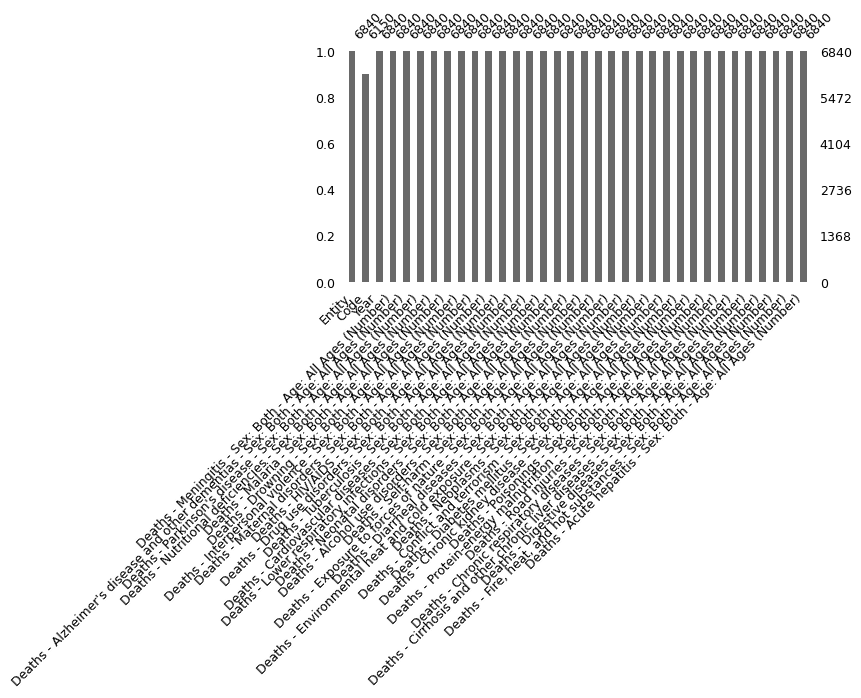

----------------------------------------------------------------------------------------------------
## Visualización de patrones en valores nulos


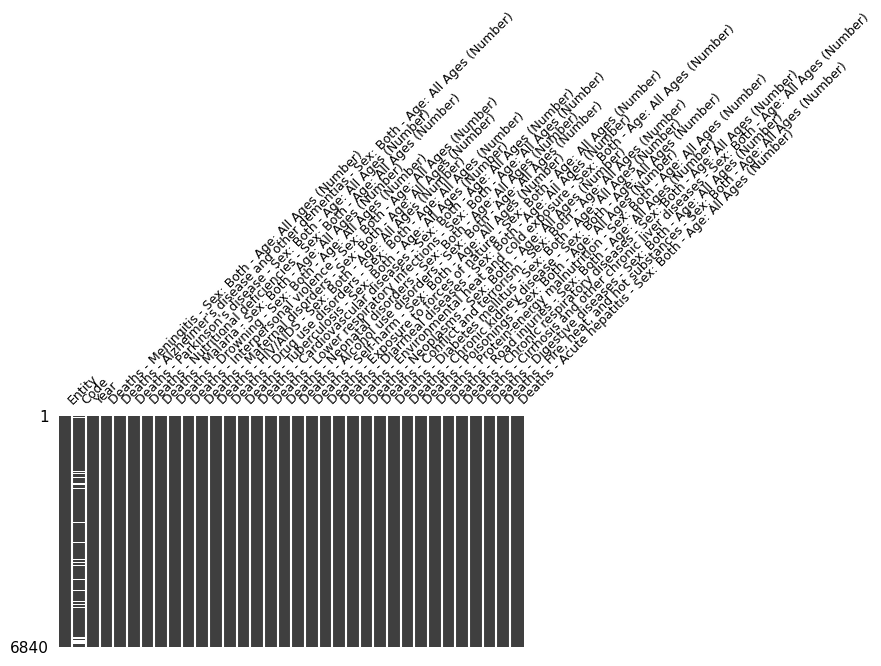

----------------------------------------------------------------------------------------------------


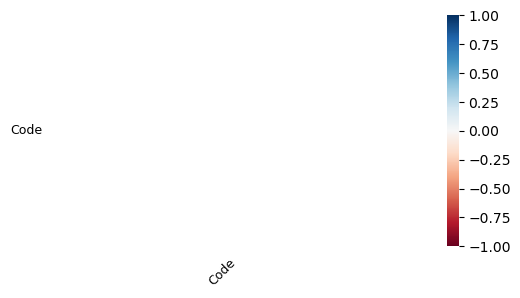

----------------------------------------------------------------------------------------------------
##########################################################################################


In [4]:
exploracion_inicial(df)

## Paso 4. Creo una columna por regiones

In [5]:
# Crear listas básicas de países por región (ejemplares; se pueden ampliar si es necesario)
africa = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde',
          'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 'Djibouti',
          'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia',
          'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', "Cote d'Ivoire", 'Kenya',
          'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
          'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
          'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia',
          'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda',
          'Zambia', 'Zimbabwe']

asia = ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei',
        'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq',
        'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon',
        'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman',
        'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore',
        'South Korea', 'Sri Lanka', 'Syria', 'Tajikistan', 'Thailand', 'Timor', 'Turkey',
        'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen']

europa = ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina',
          'Bulgaria', 'Croatia', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France',
          'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kosovo', 'Latvia',
          'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco',
          'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal',
          'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain',
          'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom']

america = ['Antigua and Barbuda', 'Argentina', 'Bahamas', 'Barbados', 'Belize', 'Bolivia',
           'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Dominica',
           'Dominican Republic', 'Ecuador', 'El Salvador', 'Grenada', 'Guatemala', 'Guyana',
           'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru',
           'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines',
           'Suriname', 'Trinidad and Tobago', 'United States', 'Uruguay', 'Venezuela']

oceania = ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia (country)', 'Nauru',
           'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga',
           'Tuvalu', 'Vanuatu']

# Función para asignar región
def asignar_region(entidad):
    if entidad in africa:
        return 'África'
    elif entidad in asia:
        return 'Asia'
    elif entidad in europa:
        return 'Europa'
    elif entidad in america:
        return 'América'
    elif entidad in oceania:
        return 'Oceanía'
    elif 'WHO' in entidad or 'World Bank' in entidad or entidad in ['World', 'OECD Countries', 'G20']:
        return 'Agregado'
    else:
        return 'Otros'

# Aplicar la función
df['Region'] = df['Entity'].apply(asignar_region)

# Mostrar resumen de regiones asignadas
region_counts = df['Region'].value_counts()
region_counts


Region
África      1560
Asia        1410
Europa      1260
América     1050
Otros        750
Oceanía      420
Agregado     390
Name: count, dtype: int64

In [6]:
# Crear un diccionario de corrección manual para las entidades mal clasificadas
correcciones = {
    'Cape Verde': 'África',
    'Democratic Republic of Congo': 'África',
    'Taiwan': 'Asia',
    'East Timor': 'Asia',
    'Wales': 'Europa',
    'Scotland': 'Europa',
    'England': 'Europa',
    'Northern Ireland': 'Europa',
    'American Samoa': 'América',
    'Puerto Rico': 'América',
    'Guam': 'América',
    'United States Virgin Islands': 'América',
    'Northern Mariana Islands': 'América',
    'Greenland': 'América',
    'Bermuda': 'América',
    'Cook Islands': 'Oceanía',
    'Niue': 'Oceanía',
    'Tokelau': 'Oceanía',
    'Europe & Central Asia (WB)': 'Agregado',
    'East Asia & Pacific (WB)': 'Agregado',
    'Latin America & Caribbean (WB)': 'Agregado',
    'Middle East & North Africa (WB)': 'Agregado',
    'North America (WB)': 'Agregado',
    'South Asia (WB)': 'Agregado',
    'Sub-Saharan Africa (WB)': 'Agregado'
}

# Aplicar correcciones específicas
df['Region'] = df.apply(
    lambda row: correcciones[row['Entity']] if row['Entity'] in correcciones else row['Region'], axis=1
)

# Comprobar el resultado actualizado
region_counts_actualizado = df['Region'].value_counts()
otros_actualizado = df[df['Region'] == 'Otros']['Entity'].unique()

print(region_counts_actualizado)
print("Otros:", otros_actualizado)



Region
África      1620
Asia        1470
Europa      1380
América     1260
Agregado     600
Oceanía      510
Name: count, dtype: int64
Otros: []


In [7]:
agredados = df[df['Region']== 'Agregado']['Entity'].unique()

In [8]:
agredados

array(['African Region (WHO)', 'East Asia & Pacific (WB)',
       'Eastern Mediterranean Region (WHO)', 'Europe & Central Asia (WB)',
       'European Region (WHO)', 'G20', 'Latin America & Caribbean (WB)',
       'Middle East & North Africa (WB)', 'North America (WB)',
       'OECD Countries', 'Region of the Americas (WHO)',
       'South Asia (WB)', 'South-East Asia Region (WHO)',
       'Sub-Saharan Africa (WB)', 'Western Pacific Region (WHO)', 'World',
       'World Bank High Income', 'World Bank Low Income',
       'World Bank Lower Middle Income', 'World Bank Upper Middle Income'],
      dtype=object)

## Paso 5 Los agregados los añado a una región específica para disminuir número de agregados

In [9]:
# Lista de agregados
agregados = [
    'African Region (WHO)',
    'East Asia & Pacific (WB)',
    'Eastern Mediterranean Region (WHO)',
    'Europe & Central Asia (WB)',
    'European Region (WHO)',
    'G20',
    'Latin America & Caribbean (WB)',
    'Middle East & North Africa (WB)',
    'North America (WB)',
    'OECD Countries',
    'Region of the Americas (WHO)',
    'South Asia (WB)',
    'South-East Asia Region (WHO)',
    'Sub-Saharan Africa (WB)',
    'Western Pacific Region (WHO)',
    'World',
    'World Bank High Income',
    'World Bank Low Income',
    'World Bank Lower Middle Income',
    'World Bank Upper Middle Income'
]

# Función para reclasificar agregados
def reclasificar_agregado(entidad):
    if 'Africa' in entidad:
        return 'África'
    elif 'Asia' in entidad or 'Pacific' in entidad:
        return 'Asia'
    elif 'Europe' in entidad or 'European' in entidad:
        return 'Europa'
    elif 'America' in entidad or 'Americas' in entidad:
        return 'América'
    else:
        return 'Otros'

# Aplicar solo a las entidades que están en "agregados"
mask = df['Entity'].isin(agregados)
df.loc[mask, 'Region'] = df.loc[mask, 'Entity'].apply(reclasificar_agregado)

# Finalmente, nuevamente aseguramos que otras entidades agregadas no clasificadas estén en "Otros"
df.loc[df['Entity'].isin(agregados) & df['Region'].isnull(), 'Region'] = 'Otros'

# Comprobar resumen actualizado
print(df['Region'].value_counts())
print("Entidades en 'Otros':")
print(df[df['Region'] == 'Otros']['Entity'].unique())


Region
África     1710
Asia       1620
Europa     1410
América    1350
Oceanía     510
Otros       240
Name: count, dtype: int64
Entidades en 'Otros':
['Eastern Mediterranean Region (WHO)' 'G20' 'OECD Countries' 'World'
 'World Bank High Income' 'World Bank Low Income'
 'World Bank Lower Middle Income' 'World Bank Upper Middle Income']


## Paso 6 Limpio el título de las columnas de causa de muerte

In [10]:
# Renombrar columnas dejando solo la causa de muerte
nuevos_nombres = []

for col in df.columns:
    if col.startswith("Deaths -"):
        partes = col.split(" - ")
        nuevos_nombres.append(partes[1].strip())  # causa de muerte
    else:
        nuevos_nombres.append(col)

df.columns = nuevos_nombres


## Paso 7 visualizas los datos a nivel global

In [11]:
df[df['Code']== 'OWID_WRL'].describe()

,Year,Meningitis,Alzheimer's disease and other dementias,Parkinson's disease,Nutritional deficiencies,Malaria,Drowning,Interpersonal violence,Maternal disorders,HIV/AIDS,...,Diabetes mellitus,Chronic kidney disease,Poisonings,Protein-energy malnutrition,Road injuries,Chronic respiratory diseases,Cirrhosis and other chronic liver diseases,Digestive diseases,"Fire, heat, and hot substances",Acute hepatitis
count,30.000000,30.000000,3.000000e+01,30.000000,30.000000,30.00000,30.000000,30.00000,30.000000,3.000000e+01,...,3.000000e+01,3.000000e+01,30.000000,30.000000,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,30.000000,30.000000
mean,2004.500000,351027.066667,9.928584e+05,239461.033333,459970.866667,845044.20000,343581.233333,425954.10000,257746.666667,1.213222e+06,...,1.049415e+06,9.643571e+05,86741.133333,401286.200000,1.210570e+06,3.488160e+06,1.249999e+06,2.189149e+06,120191.500000,126204.066667
std,8.803408,61053.602304,3.212604e+05,66296.408536,176167.622264,102828.76904,75761.313941,18888.02484,35289.028019,4.290712e+05,...,2.603604e+05,2.575004e+05,4212.121120,156756.993493,5.222630e+04,2.000600e+05,1.348363e+05,1.981934e+05,6910.689714,28453.168059
min,1990.000000,236222.000000,5.609350e+05,147238.000000,251577.000000,629854.00000,237242.000000,373124.00000,196471.000000,3.363870e+05,...,6.618240e+05,6.013070e+05,77162.000000,212242.000000,1.113411e+06,3.093755e+06,1.012975e+06,1.855372e+06,109262.000000,79176.000000
25%,1997.250000,303437.000000,7.231208e+05,180885.750000,302363.500000,814954.00000,277143.500000,416835.00000,229231.750000,9.415095e+05,...,8.353152e+05,7.384155e+05,85007.000000,259718.000000,1.172478e+06,3.387918e+06,1.132718e+06,2.019724e+06,112575.000000,105113.500000
50%,2004.500000,362835.000000,9.279365e+05,232228.500000,385566.500000,870806.50000,335739.500000,423697.50000,265035.500000,1.187538e+06,...,1.035646e+06,9.403085e+05,87968.500000,337896.000000,1.207582e+06,3.474659e+06,1.280963e+06,2.208227e+06,123480.500000,128120.000000
75%,2011.750000,399242.500000,1.236613e+06,291126.500000,641164.750000,916883.00000,412036.500000,440246.75000,289363.250000,1.560783e+06,...,1.228247e+06,1.168814e+06,89752.750000,560704.250000,1.258469e+06,3.554956e+06,1.353732e+06,2.327507e+06,125973.000000,151362.750000
max,2019.000000,432524.000000,1.623276e+06,362907.000000,757152.000000,961129.00000,460665.000000,463129.00000,302586.000000,1.844490e+06,...,1.551170e+06,1.427232e+06,92101.000000,656314.000000,1.285039e+06,3.974315e+06,1.472012e+06,2.557689e+06,129705.000000,166405.000000


In [14]:
# Filtrar por Entity='World' y los años deseados
world_2000 = df[(df['Entity'] == 'World') & (df['Year'] == 2000)]
world_2019 = df[(df['Entity'] == 'World') & (df['Year'] == 2019)]

# Seleccionar solo columnas numéricas
cols_numericas = df.select_dtypes(include='number').columns.drop('Year')

# Calcular la diferencia
diferencia_world = world_2019[cols_numericas].values[0] - world_2000[cols_numericas].values[0]

# Crear DataFrame resultado
diferencia_df = pd.DataFrame({
    'Causa de muerte': cols_numericas,
    'World 2000':world_2000[cols_numericas].values[0],
    'World 2019':world_2019[cols_numericas].values[0],
    'Aumento de muertes (2019 - 2000)': diferencia_world
}).sort_values(by='Aumento de muertes (2019 - 2000)', ascending=False)

In [15]:
diferencia_df

,Causa de muerte,World 2000,World 2019,Aumento de muertes (2019 - 2000)
11,Cardiovascular diseases,13964207,18562510,4598303
19,Neoplasms,7005380,10079637,3074257
1,Alzheimer's disease and other dementias,787089,1623276,836187
21,Diabetes mellitus,906946,1551170,644224
22,Chronic kidney disease,815370,1427232,611862
26,Chronic respiratory diseases,3451228,3974315,523087
28,Digestive diseases,2080656,2557689,477033
27,Cirrhosis and other chronic liver diseases,1178262,1472012,293750
2,Parkinson's disease,198655,362907,164252
9,Drug use disorders,89718,128083,38365


In [110]:
diferencia_df.to_csv(r'C:\Users\alber\OneDrive\Desktop\TFM\data\data\HIPOTESIS 1/Diferencias_world_1990_2019.csv')

### Una imagen general de las causas de muertes que más han aumentado a nivel global y cuáles han descendido

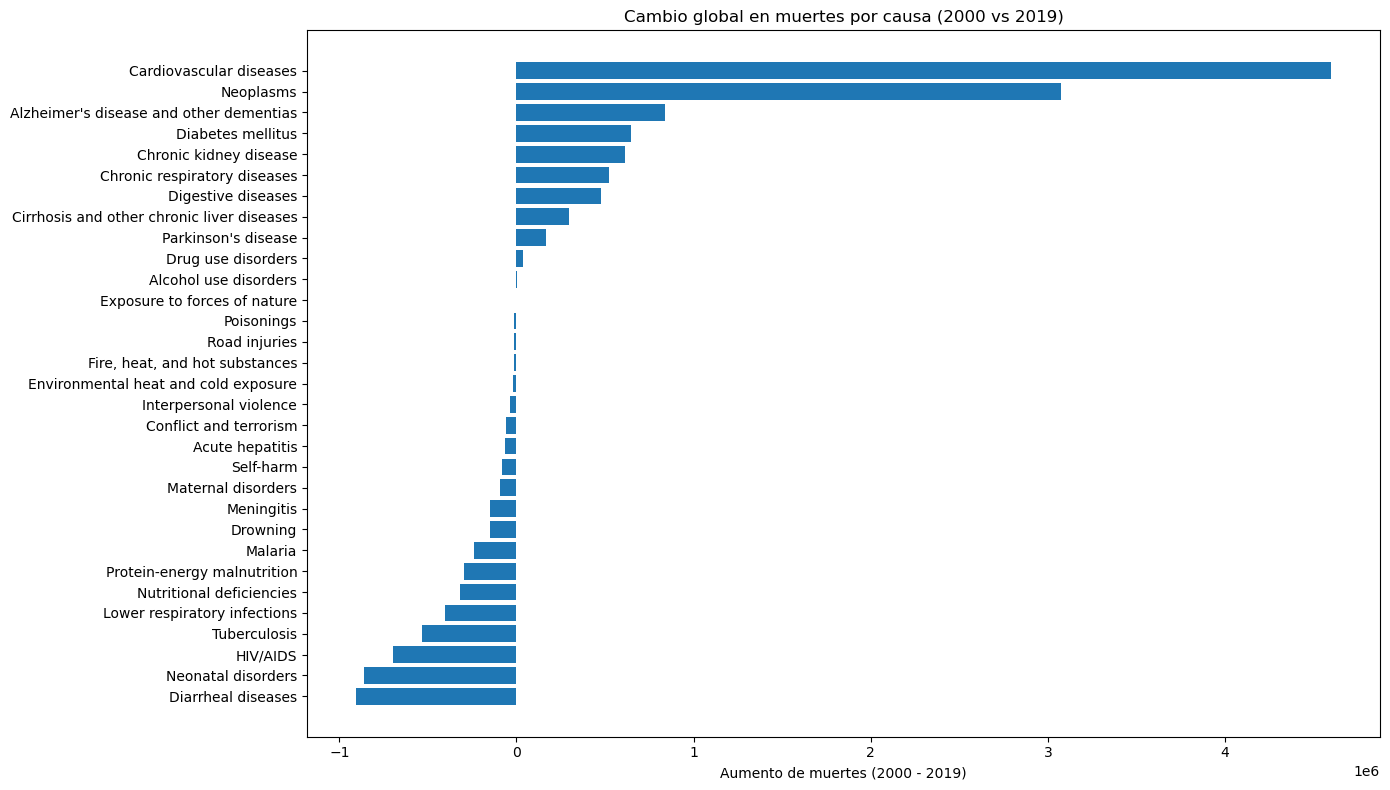

In [16]:
plt.figure(figsize=(14, 8))
plt.barh(diferencia_df['Causa de muerte'], diferencia_df['Aumento de muertes (2019 - 2000)'])
plt.xlabel('Aumento de muertes (2000 - 2019)')
plt.title('Cambio global en muertes por causa (2000 vs 2019)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## Paso 8 añado df de renta per capita 
Me quedo con los años de 2000 hasta 2019 porque son los años que tenemos en el df de causa de muertes

In [17]:
df_renta_per_capita=pd.read_csv('gdp_per_capita_penn_world_table.csv')

In [18]:
df_renta_per_capita.rename(columns={'GDP per capita (output, multiple price benchmarks)':'Renta per capita'},inplace=True)

In [19]:
df_filtrado = df_renta_per_capita[df_renta_per_capita['Year'].between(2000,2019)]
df_filtrado

,Entity,Code,Year,Renta per capita
29,Albania,ALB,2000,5315.4300
30,Albania,ALB,2001,5525.6910
31,Albania,ALB,2002,5636.1846
32,Albania,ALB,2003,5861.1265
33,Albania,ALB,2004,6038.8965
...,...,...,...,...
10103,Zimbabwe,ZWE,2015,2880.9058
10104,Zimbabwe,ZWE,2016,2919.6170
10105,Zimbabwe,ZWE,2017,3112.8750
10106,Zimbabwe,ZWE,2018,3007.2370


In [20]:
df_agrupado_renta_per_capita = df_filtrado.groupby(['Entity', 'Code'], as_index=False)['Renta per capita'].mean().round(2)
df_agrupado_renta_per_capita

,Entity,Code,Renta per capita
0,Albania,ALB,9096.60
1,Algeria,DZA,12529.18
2,Angola,AGO,6069.02
3,Anguilla,AIA,25737.78
4,Antigua and Barbuda,ATG,17173.62
...,...,...,...
177,Venezuela,VEN,14045.54
178,Vietnam,VNM,4694.51
179,Yemen,YEM,2949.57
180,Zambia,ZMB,2644.34


In [21]:
df_agrupado_renta_per_capita['Quintil Renta'] = pd.qcut(df_agrupado_renta_per_capita['Renta per capita'], q=5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])
df_agrupado_renta_per_capita

,Entity,Code,Renta per capita,Quintil Renta
0,Albania,ALB,9096.60,Q2
1,Algeria,DZA,12529.18,Q3
2,Angola,AGO,6069.02,Q2
3,Anguilla,AIA,25737.78,Q4
4,Antigua and Barbuda,ATG,17173.62,Q4
...,...,...,...,...
177,Venezuela,VEN,14045.54,Q3
178,Vietnam,VNM,4694.51,Q2
179,Yemen,YEM,2949.57,Q1
180,Zambia,ZMB,2644.34,Q1


In [22]:
df_agrupado_renta_per_capita.drop(columns='Code',inplace=True)

In [23]:
df_gdp_muerte=pd.merge(df,df_agrupado_renta_per_capita,on='Entity')

In [24]:
q1 = [
    "Mali", "Guinea-Bissau", "Madagascar", "Nepal", "Zambia",
    "Cambodia", "Tanzania", "Sudan", "Sierra Leone", "Uganda",
    "Mozambique", "Bangladesh", "Burundi", "Rwanda", "Malawi",
    "Niger", "Ethiopia", "Liberia"
]

q2 = [
    "Egypt", "Palestine", "Indonesia", "Djibouti", "Honduras",
    "Ghana", "China", "El Salvador", "Guatemala", "Nicaragua",
    "Cape Verde", "Bolivia", "Morocco", "India", "Mongolia",
    "Laos", "Bhutan", "Angola"
]

q3 = [
    "Tunisia", "North Macedonia", "Serbia", "Gabon", "Dominican Republic",
    "Ecuador", "Suriname", "Colombia", "Thailand", "Algeria",
    "Brazil", "Azerbaijan", "Peru", "Iran", "Iraq",
    "Lebanon", "Maldives"
]

q4 = [
    "Croatia", "Spain", "Kazakhstan", "Panama", "Slovakia",
    "Romania", "Hungary", "Malta", "Poland", "Portugal",
    "Chile", "Czechia", "Cyprus", "Slovenia", "Oman",
    "Estonia", "Turkey", "Equatorial Guinea", "South Korea"
]

q5 = [
    "Norway", "Switzerland", "Kuwait", "Bermuda", "Luxembourg",
    "Italy", "Denmark", "Taiwan", "Finland", "Qatar",
    "New Zealand", "Bahrain", "Ireland", "Macao", "Hong Kong",
    "United Arab Emirates", "Saudi Arabia", "Singapore"]

----------------------------------------------------------------------------------------------------------------------------

### Paso 9 Visualizar causas de muerte que más han aumentado vs las que menos por quintiles

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_descenso_causas_multiquintil(df, quintiles, año_inicio, año_fin, top_n=5):
    """
    Grafica en una misma figura la evolución temporal de las top_n causas que más han descendido
    en cada quintil especificado.
    """
    n_quintiles = len(quintiles)
    fig, axes = plt.subplots(n_quintiles, 1, figsize=(14, 5*n_quintiles), sharex=True)
    
    if n_quintiles == 1:
        axes = [axes]
    
    for i, quintil in enumerate(quintiles):
        df_mask = df[(df['Quintil Renta'] == quintil) & (df['Year'] >= año_inicio) & (df['Year'] <= año_fin)]
        
        cols_causas = df_mask.select_dtypes(include='number').columns
        cols_causas = [c for c in cols_causas if c not in ['Year']]
        
        df_dif = df_mask[df_mask['Year'].isin([año_inicio, año_fin])]
        df_diff_sum = df_dif.groupby('Year')[cols_causas].sum()
        descenso_total = df_diff_sum.iloc[-1] - df_diff_sum.iloc[0]
        
        top_causas = descenso_total.sort_values().head(top_n).index.tolist()
        
        for causa in top_causas:
            sns.lineplot(data=df_diff_sum, x=df_diff_sum.index, y=causa, marker='o', label=causa, ax=axes[i])
        
        axes[i].set_title(f"Quintil {quintil}: Top {top_n} causas que más han descendido")
        axes[i].set_ylabel("Número total de muertes")
        axes[i].grid(True)
        axes[i].legend()
    
    axes[-1].set_xlabel("Año")
    plt.tight_layout()
    plt.show()


### Causas de muertes que más han descendido por quintiles

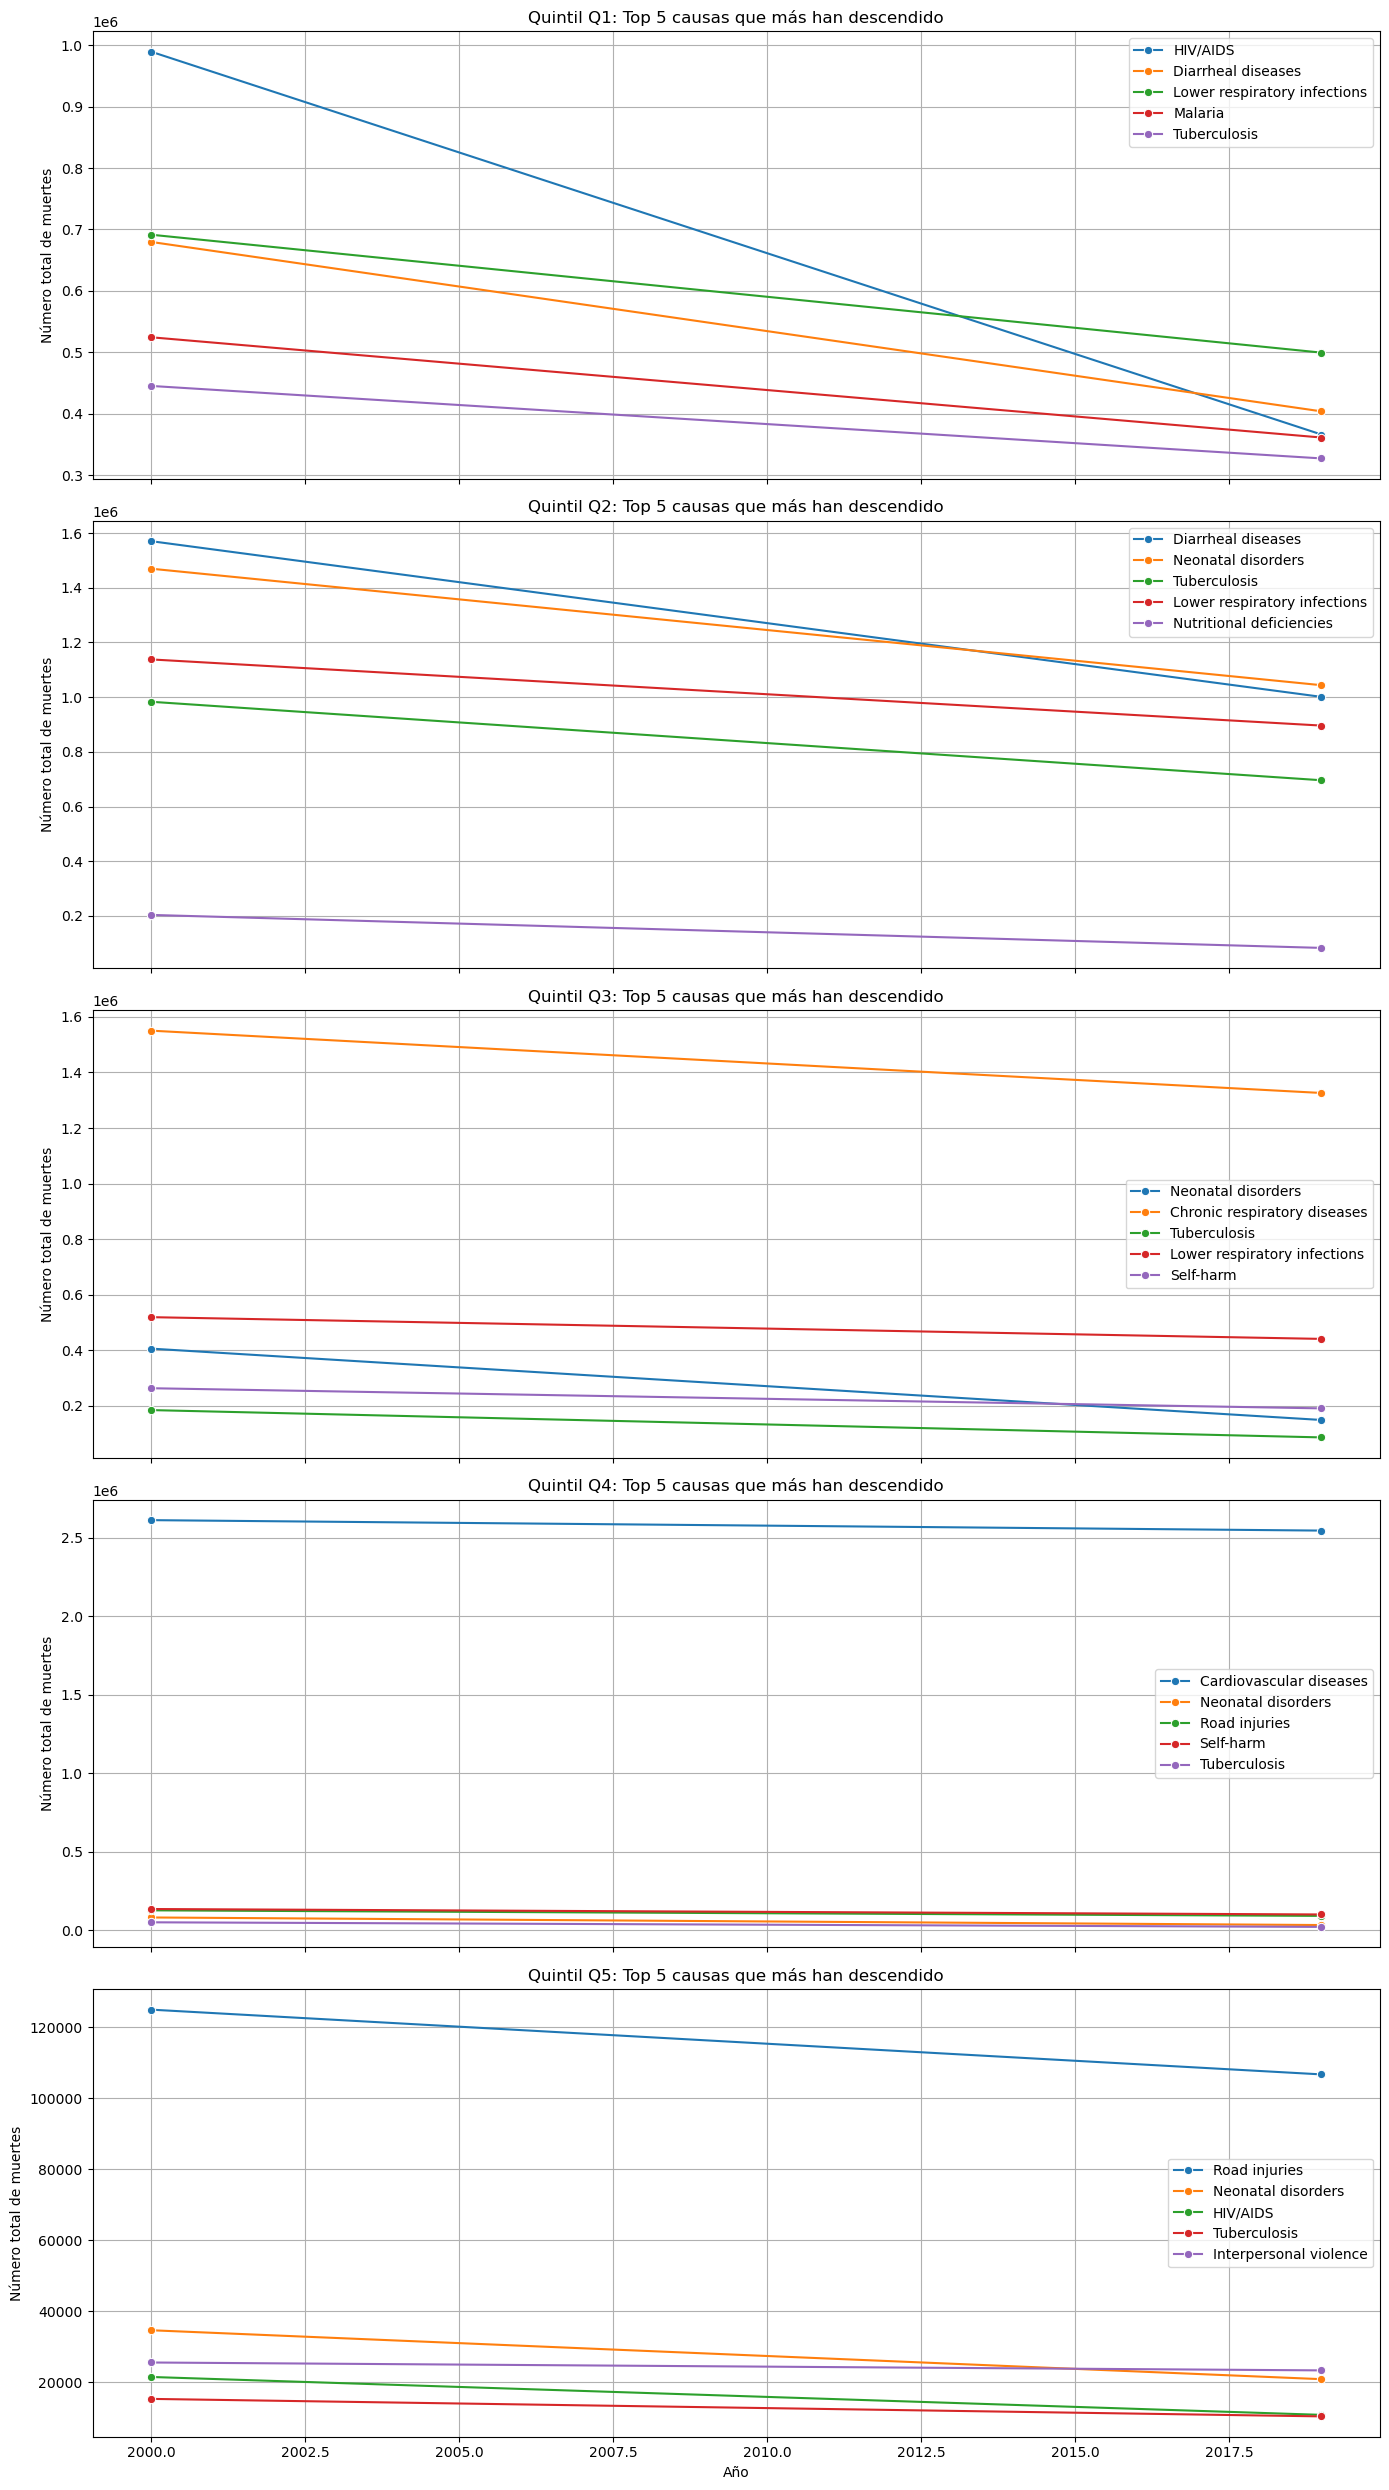

In [26]:
quintiles = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']
plot_descenso_causas_multiquintil(df_gdp_muerte, quintiles, 2000, 2019, top_n=5)


### Al analizar las causas de muerte que más han descendido por quintiles (gráfica naranja), se observa que los países más pobres (Q1 y Q2) han logrado reducir drásticamente causas prevenibles: diarreas, tuberculosis, desnutrición, infecciones respiratorias, etc.

### Esto explica por qué países con baja renta han ganado más años de vida: han resuelto parcialmente los retos sanitarios más básicos.

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_aumento_causas_multiquintil(df, quintiles, año_inicio, año_fin, top_n=5):
    """
    Grafica en una misma figura la evolución temporal de las top_n causas que más han aumentado
    en cada quintil especificado.
    """
    n_quintiles = len(quintiles)
    fig, axes = plt.subplots(n_quintiles, 1, figsize=(14, 5*n_quintiles), sharex=True)
    
    if n_quintiles == 1:
        axes = [axes]
    
    for i, quintil in enumerate(quintiles):
        # Filtramos por quintil y rango de años
        df_mask = df[(df['Quintil Renta'] == quintil) & (df['Year'] >= año_inicio) & (df['Year'] <= año_fin)]
        
        # Seleccionamos solo columnas numéricas de causas de muerte
        cols_causas = df_mask.select_dtypes(include='number').columns
        cols_causas = [c for c in cols_causas if c not in ['Year']]
        
        # Filtramos los años extremos y sumamos por año
        df_dif = df_mask[df_mask['Year'].isin([año_inicio, año_fin])]
        df_diff_sum = df_dif.groupby('Year')[cols_causas].sum()
        
        # Calculamos incremento total (año_fin - año_inicio)
        incremento_total = df_diff_sum.iloc[-1] - df_diff_sum.iloc[0]
        
        # Tomamos las top_n causas que más han aumentado
        top_causas = incremento_total.sort_values(ascending=False).head(top_n).index.tolist()
        
        # Graficamos la evolución de esas causas
        for causa in top_causas:
            sns.lineplot(data=df_diff_sum, x=df_diff_sum.index, y=causa, marker='o', label=causa, ax=axes[i])
        
        axes[i].set_title(f"Quintil {quintil}: Top {top_n} causas que más han aumentado")
        axes[i].set_ylabel("Número total de muertes")
        axes[i].grid(True)
        axes[i].legend()
    
    axes[-1].set_xlabel("Año")
    plt.tight_layout()
    plt.show()


### Causas de muerte que más han aumentado por quintiles

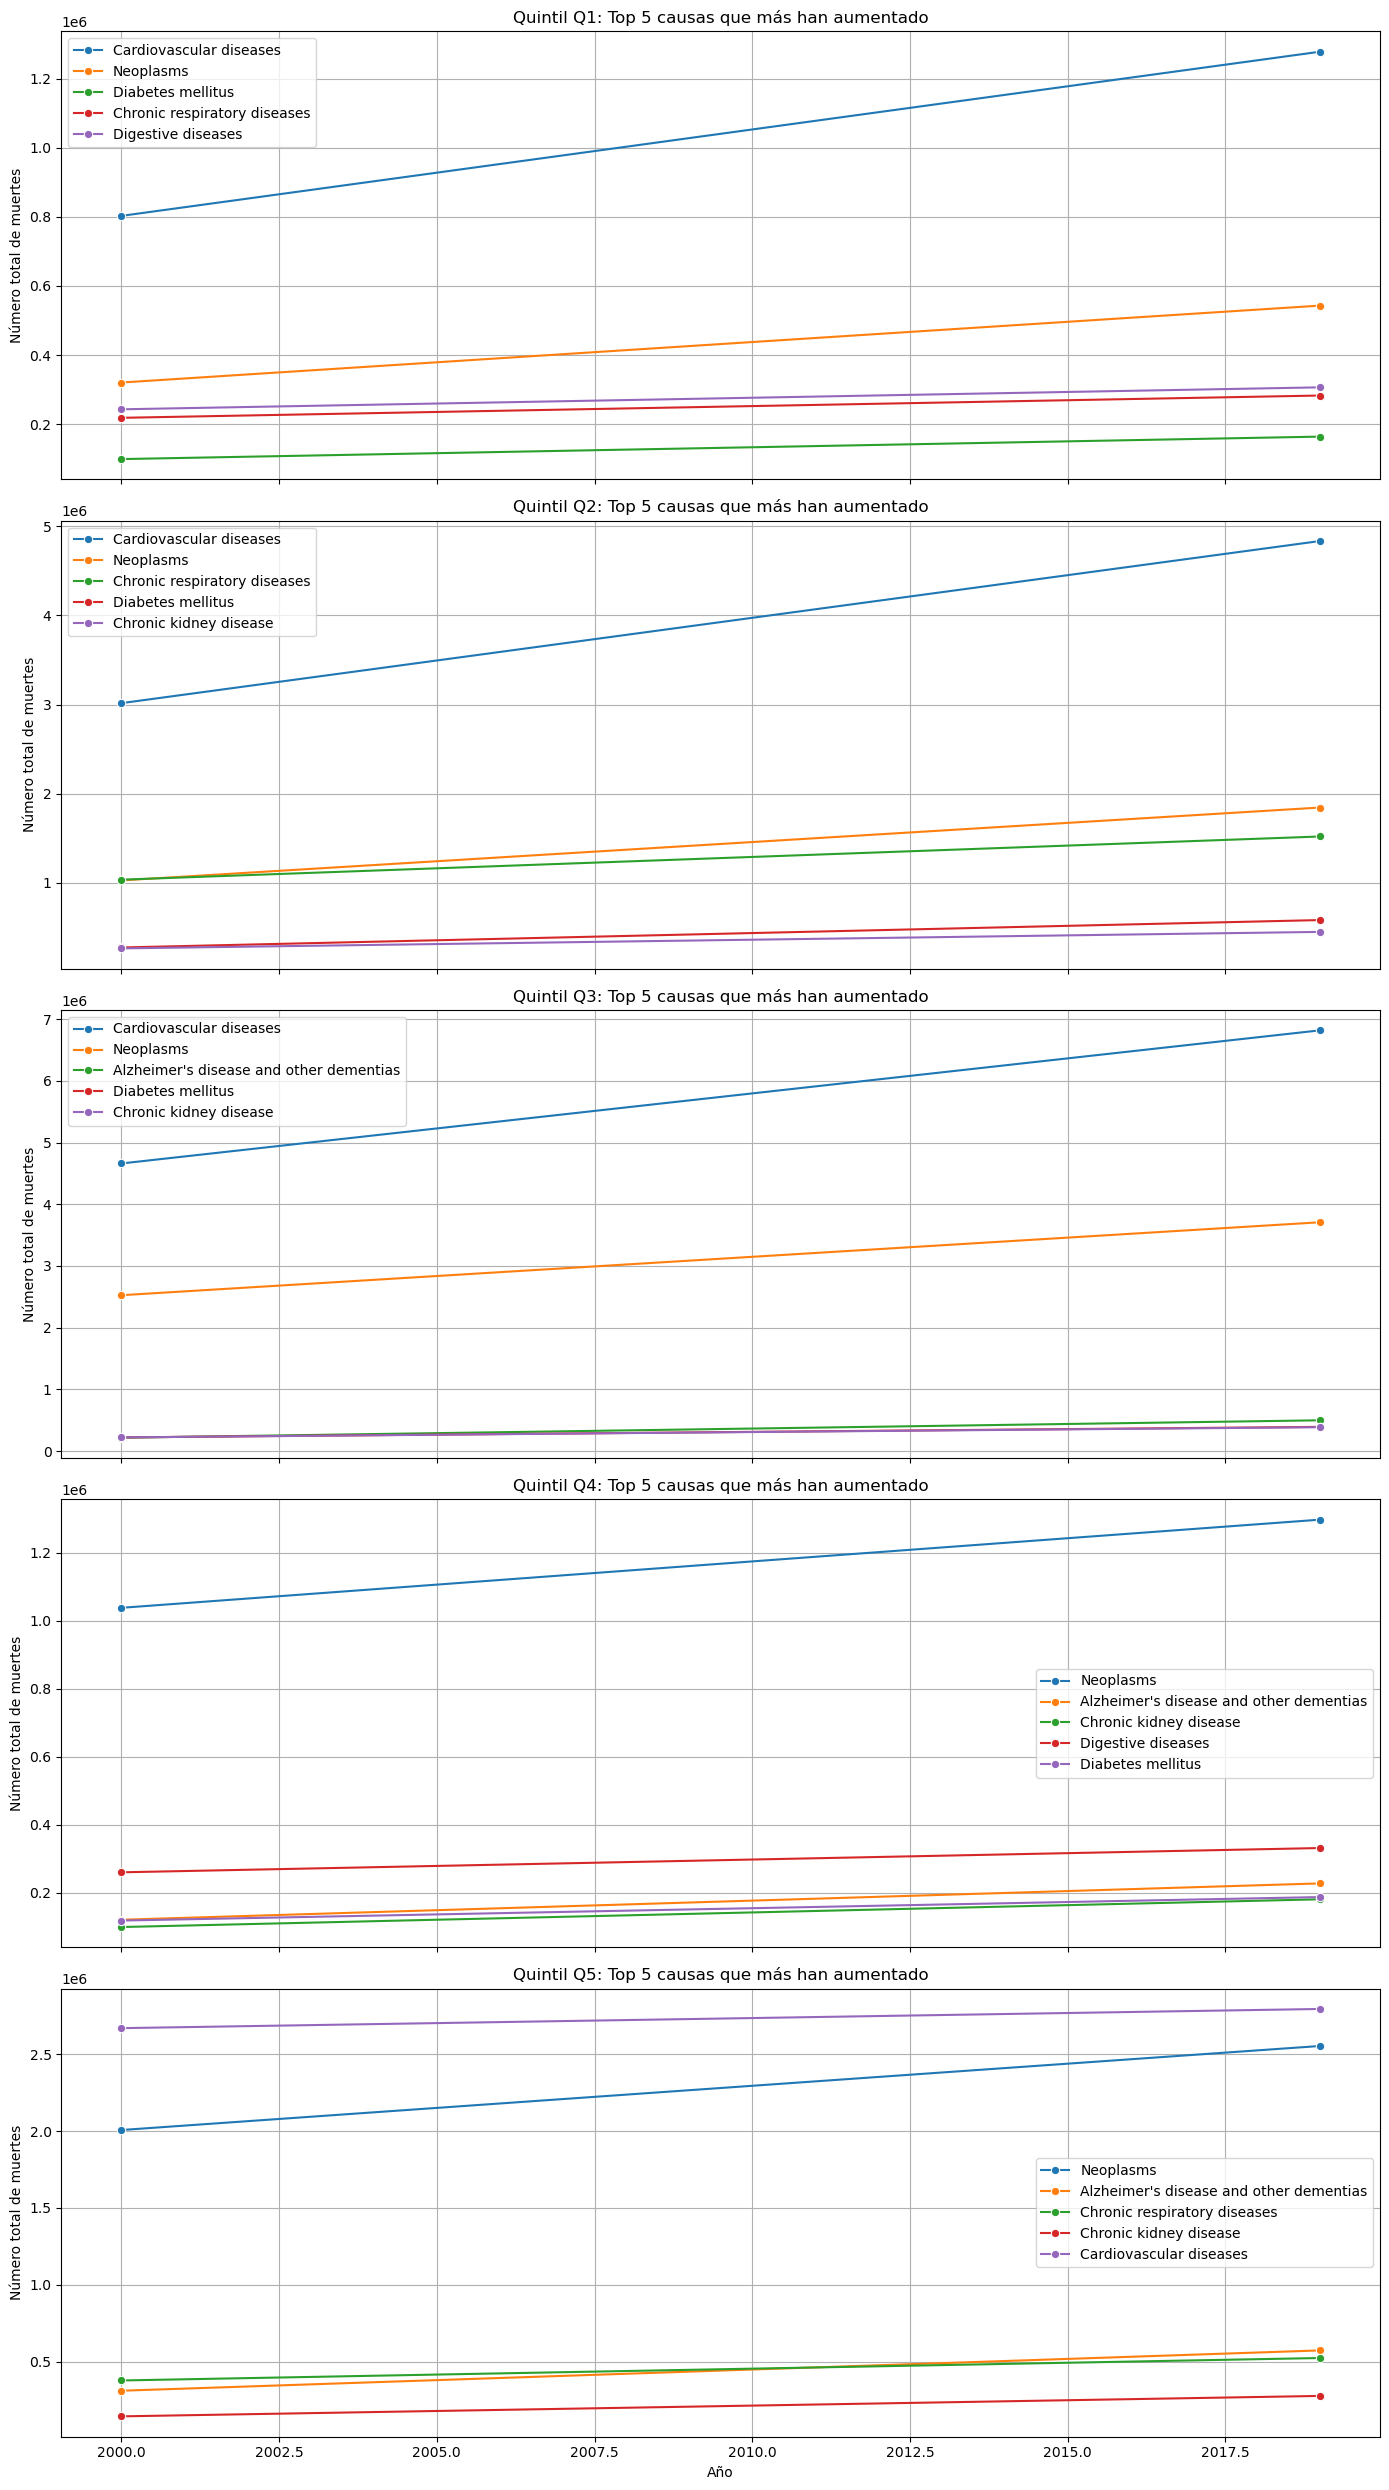

In [29]:
quintiles = ['Q1','Q2','Q3','Q4','Q5']
plot_aumento_causas_multiquintil(df_gdp_muerte, quintiles, 2000, 2019, top_n=5)


A pesar de que los países con mayor renta presentan sistemas sanitarios más robustos, el mayor aumento en esperanza de vida se da en los países más pobres, gracias a la reducción de muertes por causas evitables.

La correlación entre renta y esperanza de vida resulta débil (-0.29), pero si analizamos la reducción de enfermedades prevenibles (diarreas, neonatal, tuberculosis…), sí aparece una relación clara con el aumento de longevidad.

### Este fenómeno se enmarca en la transición epidemiológica global: los países en desarrollo se enfrentan a enfermedades infecciosas, mientras que los países desarrollados lidian con enfermedades crónicas

### VIH sigue siendo un gran problema en África

<Axes: ylabel='Region'>

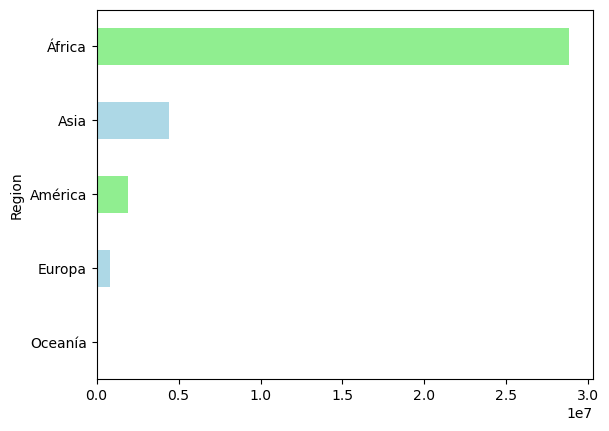

In [30]:
df_gdp_muerte.groupby('Region')['HIV/AIDS'].sum().sort_values(ascending=True).plot.barh(color=['lightgreen','lightblue'])